Computing and visualising BEM model
===================================

Author: Hadi Zaatiti <hadi.zaatiti@nyu.edu>

A Boundary Element Model (BEM) is a computational model used primarily in the field of neuroimaging, especially in magnetoencephalography (MEG) and electroencephalography (EEG), to help solve the forward problem, which involves calculating the electric or magnetic fields generated by neuronal activity in the brain at the sensors located on the scalp.

The NYUAD MRI lab will provide the MRI T1w scans of the participant, with segmentation of the different parts of the brain and different volumetry and other `freesurfer` analysis.

An example of such data is available under NYU BOX, `https://nyu.box.com/v/meg-datafiles <https://nyu.box.com/v/meg-datafiles>`_
Access the directory: `Box\MEG\Data\resting-state\sub-01\anat`

Generating the BEM
------------------

We will now compute and plot the BEM model for the participant. Set the freesurfer SUBJECTS_DIR to `Box\MEG\Data\resting-state\sub-01\anat\outputs\PostFreeSurfer\T1w\Sub-0037`  where `Sub-0037` is the MRI ID of the subject.

Note that the ID in MEG for a participant are different than the ID in MRI.

Generate the head surfaces files using the command

You should see the following output

The command will generate the head segmentation file  `mri\seghead.mgz`

We will now generate the boundary for the brain, the inner skull and outer skull and skin

`mne watershed_bem --subject sub-0037`

You should the following output

You should see the following files in your subject directory
- the brain boundary `bem\brain.surf`
- the inner skull boundary `bem\inner_skull.surf`
- the outer skull boundary `bem\outer_skull.surf`
- the outer skin boundary `bem\outer_skin.surf`

A `sub-0037-head.fif` file should be generated aswell in the `bem` folder.
Note that for MEG, the inner skull boundary would be enough to do source localization and estimation. However, for EEG 3 layers (inner skull, outer skull, and skin) are typically used.
Let us now plot the boundaries that we generated using MNE.

Plotting the BEM for visual inspection
--------------------------------------
Let us now plot the boundaries that we generated using MNE

In [1]:
%matplotlib inline
import mne

    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\inner_skull.surf
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\outer_skull.surf
Using surface: C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\sub-0037\bem\outer_skin.surf


C:\ProgramData\mne-python\1.6.1_0\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


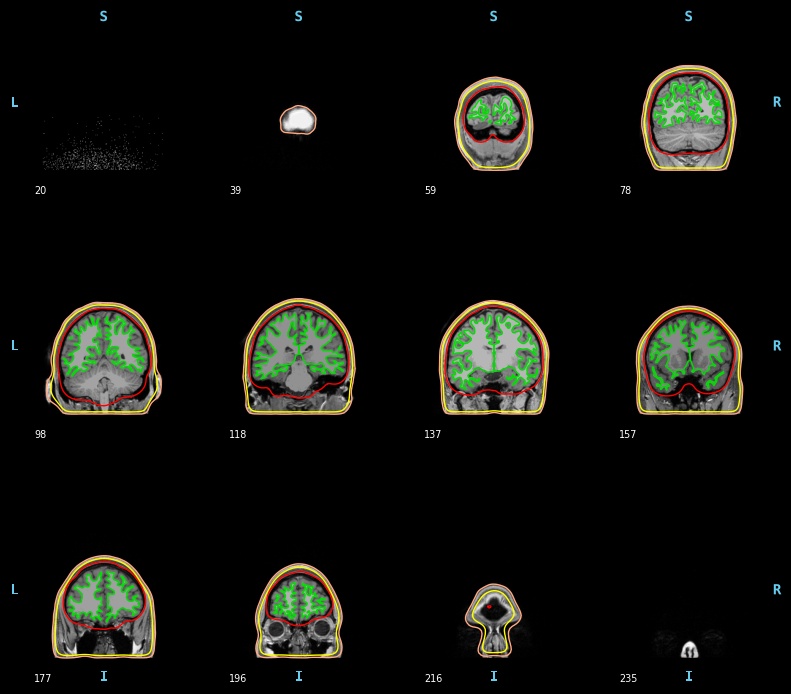

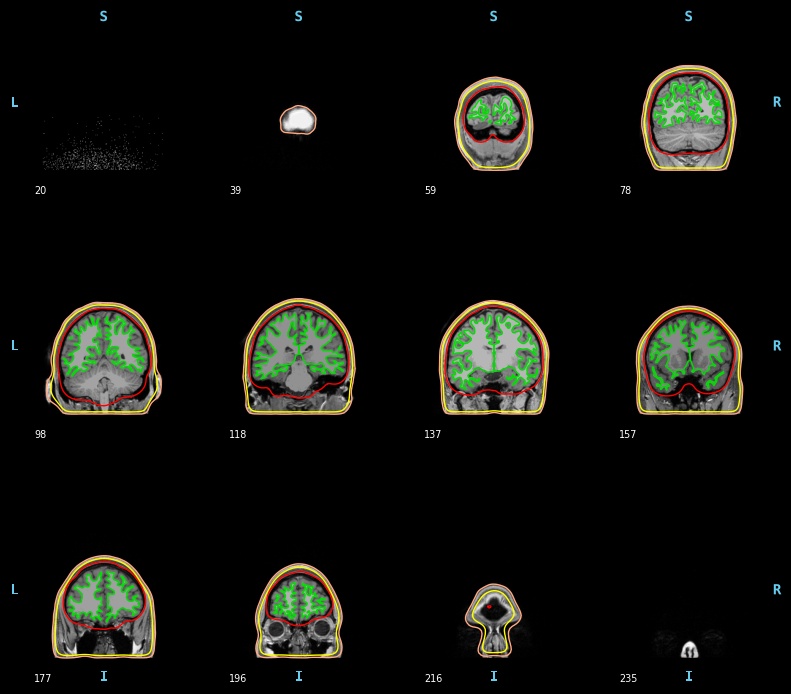

In [2]:
fif_path = r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w\Sub-0037\bem\sub-0037-head.fif'

# Load the BEM surfaces from the generated .fif file
bem_surfaces = mne.read_bem_surfaces(fif_path)

# Plot the BEM surfaces
mne.viz.plot_bem(subject='sub-0037', 
                 subjects_dir=r'C:\Users\hz3752\PycharmProjects\mne_bids_pipeline\data\anat\outputs\PostFreeSurfer\T1w',
                 brain_surfaces='white', 
                 src=None, 
                 orientation='coronal')